# Job Prediction Project



### Project Question:

    The job prediction model aims to predict whether the employee will keep his/her job in the company or will resign. Furthermore, the model targets the Human Resources (HR) employee. If the model predicts the resignation of an employee, the HR employee will be able to take one of two actions. Either make an adjustment in the workplace that will keep the employees at work, or to search for a replacement employee within a sufficient period.


In [1]:
# Import all packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# from imblearn.under_sampling import RandomUnderSampler
import imblearn.over_sampling

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,classification_report


## Dataset

In [2]:
# Load dataset
df = pd.read_csv('HR_comma_sep.csv')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Take a look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Take a look at the statistical features
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Take a look at columns names
df.columns = df.columns.map(str.strip)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Take a copy of the dataset to work with
df_copy = df.copy()

# check if there is a null values (missing values)
df_copy.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
df_copy.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

## Visualization

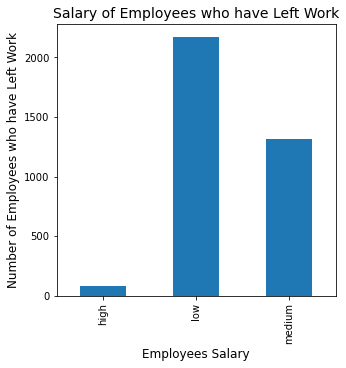

In [8]:
# Plot bar charts showing the impact of employee salaries on retention

plt.figure(figsize=(5,5)),
df_copy.groupby(['salary'])['left'].sum().plot.bar()
plt.ylabel('Number of Employees who have Left Work', fontsize=12)
plt.xlabel('Employees Salary', fontsize =12)

plt.title("Salary of Employees who have Left Work",fontsize=14)
plt.show()

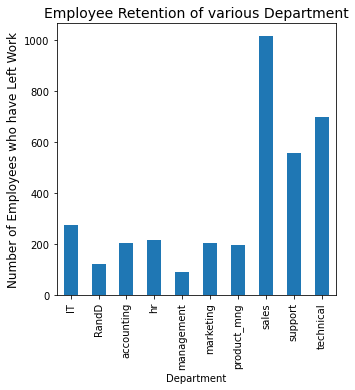

In [9]:
# Plot bar charts showing a correlation between department and employee retention
plt.figure(figsize=(5,5))
df_copy.groupby(['Department'])['left'].sum().plot.bar()
plt.ylabel('Number of Employees who have Left Work',fontsize=12)

plt.title("Employee Retention of various Department",fontsize=14)
plt.show()

## Check all features to Eliminate nonimportant features

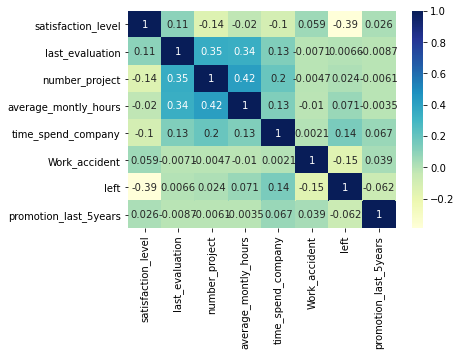

In [10]:
# View the correlations matrix
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);

In [11]:
# Eliminating the features that are not important for the analysis
df_2 = df_copy.copy()
df_2 = df_2.drop('Work_accident', axis=1)
df_2 = df_2.drop('promotion_last_5years', axis=1)
df_2.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Department,salary
0,0.38,0.53,2,157,3,1,sales,low
1,0.80,0.86,5,262,6,1,sales,medium
2,0.11,0.88,7,272,4,1,sales,medium
3,0.72,0.87,5,223,5,1,sales,low
4,0.37,0.52,2,159,3,1,sales,low


In [12]:
# Convert categorical variables into binary dummy variables.
df_dummy = pd.get_dummies(df_2)
y = df_dummy.pop('left')
x = df_dummy



In [13]:
# Balance the dataset using Random Under Sampler


# Setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y == 1)
n_neg = np.sum(y == 0)
ratio = {1 : n_pos * 4, 0 : n_neg} 

# Randomly oversample
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) 
    
x, y = ROS.fit_resample(x, y)



C:\Users\Lenovo-\anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (14284) in class 1 will be larger than the number of samples in the majority class (class #0 -> 11428)
  warnings.warn(


## Train the model


#### Logistic Regression model

In [14]:
# Divide the dataset into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


In [15]:
# Train the model with LogisticRegression

# Scale the feature first
model_LR = StandardScaler()
x_train = model_LR.fit_transform(x_train)   
x_test = model_LR.transform(x_test)


classifier_LR = LogisticRegression(random_state = 0) 
classifier_LR.fit(x_train, y_train)
y_predict_LR = classifier_LR.predict(x_test)


In [16]:
print("\n-------------------------------------------------------")
print("     Train the model with Logistic Regression      ")
print("-------------------------------------------------------\n")
print(classification_report(y_test, y_predict_LR))


-------------------------------------------------------
     Train the model with Logistic Regression      
-------------------------------------------------------

              precision    recall  f1-score   support

           0       0.79      0.69      0.74      2838
           1       0.78      0.85      0.81      3590

    accuracy                           0.78      6428
   macro avg       0.78      0.77      0.78      6428
weighted avg       0.78      0.78      0.78      6428



#### K Neighbors model

In [17]:
# Divide the dataset into training and testing.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


In [18]:
# Train the model with KNeighborsClassifier

# Choose n_neighbors=2 at first based on the number of classes
model_knn = StandardScaler()
X_train_knn = model_knn.fit_transform(X_train)   
X_test_knn = model_knn.transform(X_test)


model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn = model_knn.fit(X_train_knn,y_train)   
y_predict_knn = model_knn.predict(X_test_knn)



In [19]:
print("\n-------------------------------------------------------")
print("     Train the model with K Neighbors      ")
print("-------------------------------------------------------\n")
print(classification_report(y_test, y_predict_knn))


-------------------------------------------------------
     Train the model with K Neighbors      
-------------------------------------------------------

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2838
           1       0.97      1.00      0.98      3590

    accuracy                           0.98      6428
   macro avg       0.98      0.98      0.98      6428
weighted avg       0.98      0.98      0.98      6428



In [20]:
# Find the value of k that represent number of neighbors
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_knn,y_train)
    pred_i = knn.predict(X_test_knn)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

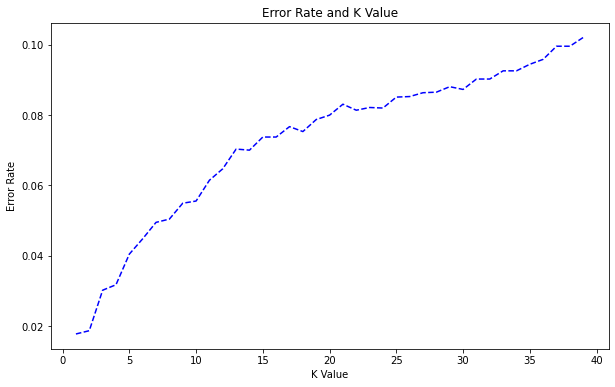

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed')
plt.title('Error Rate and K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

The K Neighbors model has higher results than the Logistic Regression model.
Therefor, the K Neighbors model will be used to predict the retention of an employee.


For the Logistic regression model, the result of the recall and f1-score are 85% and 81%, respectively. Whereas the k-nearest neighbors' model, the result of the recall and f1-score are 99% and 98%, respectively.

